# Homework 1: Applied Machine Learning Assignment

This assignment covers contents of the first three lectures.

We will be focusing on topics related to
1. Data Visualization and Analysis
2. Supervised Learning - Linear Regression, Logistic Regression, and SVM with Data Preprocessing.

### **Due Date is October 3, 11:59 PM.** 

## Name: Aaron Zhao
## UNI: sz2940

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)
    
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

# Task 1: Data Visualization and Analysis

"Now that's A LOT of data. Can you show me something I can understand?"

This question often arises when we see datasets with thousands of rows and want to understand the characteristics of data. 

Data visualization comes to our rescue!

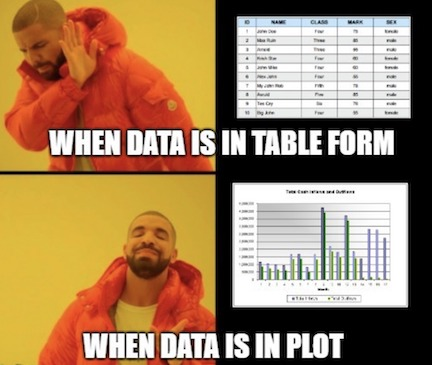


### We are going to use the credit-dataset for Task 1. 

**1.1 Plot the distribution of the features - credit_amount, age, and duration using a histogram.
Make sure to label your axes while plotting. [6 points]**



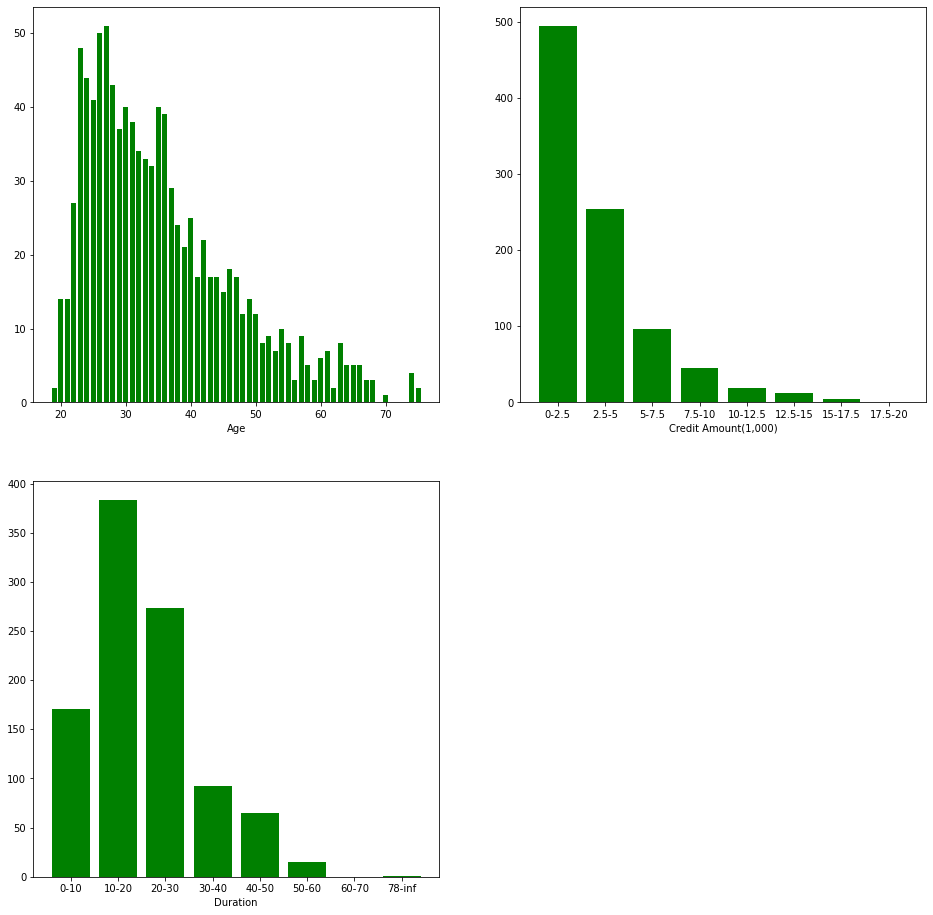

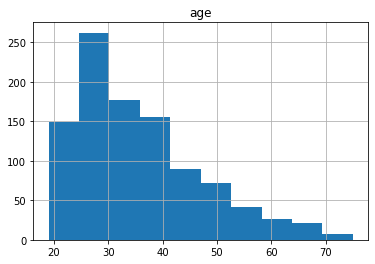

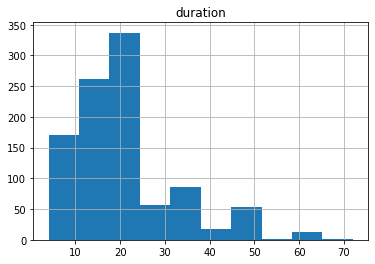

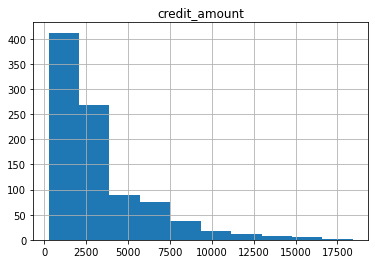

In [4]:
# The bar plots below are only for reference


import csv
from scipy.sparse import csr_matrix, vstack, hstack

dataset_credit = []

# Extract data from csv file

with open('dataset_credit.csv') as csvfile:
    csv_reader = csv.reader(csvfile) 
    dataset_credit_header = next(csv_reader)
    for row in csv_reader:
        dataset_credit.append(row)

# Extract correponding datasets - amount, age, duration


dc_amount = [dataset_credit[t][1].split() for t in range(len(dataset_credit))]
dc_age = [dataset_credit[t][5].split() for t in range(len(dataset_credit))]
dc_duration = [dataset_credit[t][0].split() for t in range(len(dataset_credit))]

# List -> Int and replace NaN by 0

for t in range(len(dc_amount)):
    if dc_amount[t] == []:
        dc_amount[t] = 0
    else:
        dc_amount[t] = int(dc_amount[t][0])

for t in range(len(dc_age)):
    if dc_age[t] == []:
        dc_age[t] = 0
    else:
        dc_age[t] = int(dc_age[t][0])
        
for t in range(len(dc_duration)):
    if dc_duration[t] == []:
        dc_duration[t] = 0
    else:
        dc_duration[t] = int(dc_duration[t][0])

# Plot

fig = plt.figure(figsize = (16,16))

ax1 = fig.add_subplot(221)
dc_age_dist = {i:dc_age.count(i) for i in dc_age}
ax1.bar(dc_age_dist.keys(), dc_age_dist.values(), color='g')
ax1.set_xlabel('Age')

ax2 = fig.add_subplot(222)
bins=[0,2500,5000,7500,10000,12500,15000,17500,20000]  
labels=["0-2.5","2.5-5","5-7.5","7.5-10","10-12.5","12.5-15","15-17.5","17.5-20"]
amount_groups=pd.cut(dc_amount,bins=bins,labels=labels)
amount_data=amount_groups.value_counts()
ax2.bar(labels, amount_data, color='g')
ax2.set_xlabel('Credit Amount(1,000)')


ax3 = fig.add_subplot(223)
bins=[0,10,20,30,40,50,60,70,np.inf]  
labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","78-inf"]
duration_groups=pd.cut(dc_duration,bins=bins,labels=labels)
duration_data=duration_groups.value_counts()
ax3.bar(labels, duration_data, color='g')
ax3.set_xlabel('Duration')


#--------------------------------------------------------------------------------------


# Load auto MPG dataset and plot the graphs using built-in df.hist
dataset_credit_df = pd.read_csv('dataset_credit.csv')

dataset_credit_df.hist(column=['age']);
dataset_credit_df.hist(column=['duration']);
dataset_credit_df.hist(column=['credit_amount']);

plt.show()

**1.2 Plot the relationships between the features - class and credit_amount using box plots. Make sure to label the axes[4 points]**



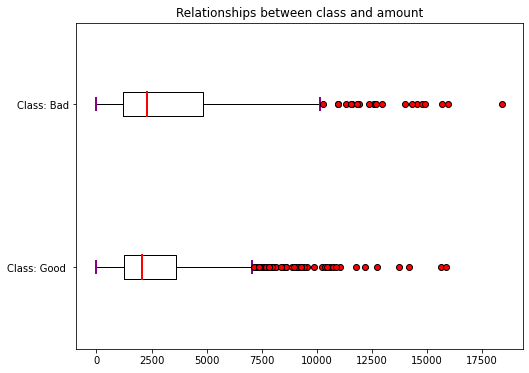

In [5]:

# Extract dataset

dc_class = [dataset_credit[t][7].split()[0] for t in range(len(dataset_credit))]


# Get good data & bad data

good_data = []
bad_data = []
for t in range(len(dc_class)):
    if dc_class[t] == 'good':
        good_data.append(dc_amount[t])
    else:
        bad_data.append(dc_amount[t])


# Creating axes instance

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)


bp = ax.boxplot([good_data, bad_data], notch = 0,
               vert = 0, flierprops = dict(markerfacecolor='red'))

for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 2)

# x-axis labels
ax.set_yticklabels(['Class: Good ', 'Class: Bad'])
 
# Adding title
plt.title("Relationships between class and amount")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()


**1.3 Plot the distribution of label 'class' using a pie chart. Be sure to label correctly. What do you infer about the data and its distribution from all the plots? (1.1, 1.2, and 1.3)[5 points]**

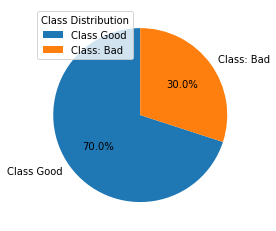

In [6]:

y = np.array([len(good_data), len(bad_data)])
mylabels = ["Class Good", "Class: Bad"]

plt.pie(y, labels = mylabels, startangle = 90, autopct = '%1.1f%%')
plt.legend(title = "Class Distribution")
plt.show() 


What do I learn from the data:

The data is not evenly distributed and we can observe pretty much the same  
distributions among all 3 graphs. The population mainly distrubutes between  
20-30, people tend to pay their credit in a duration of 10-20 units (lets say day),  
and most of the people have 0-5k credit amount in their bank accounts  

From the histograms, we can easily conclude that the credit amount  
has strong relationships with age and duration. As for the relationship  
between amount and age, we can observe that the younger generation has  
a tendency to have longer duration than the elderly population.  

People between 50-70 merely has duration longer than 25 (assume the unit is day),  
and most of the younger generation tend to have a relatively higher credit  
amount and longer duration. People who are in their 20s to 40s have a longer  
duration and a higher credit amount.  

As for the relationship between duration and credit amount, the longer duration  
a person has, he/she will tend to have a higher credit amount. The shorter  
duration a person has, he/she will not likely to have a high credit amount.  

From the second chart, we can come to a conclusion that the median of  
good class and bad class are pretty much the same but the maximum of bad class  
is way larger than the maximun of the good class. The good class is also tighter  
than the bad class but the bad class is more skewed than good class.  

The proportion of good class takes nearly 70% of all the account, which means  
the majority of the population is within the good class but it is still worthnoticed  
that almost 20% of the accounts are in bad class.  


# Task 2 : Linear Models for Regression and Classification

In this notebook, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

## Part 1: Linear Regression

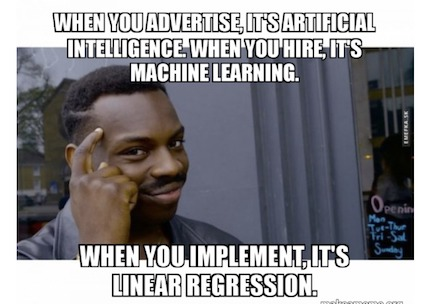

In part 1, we will use two datasets - synthetic and auto-mpg to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:

$ 𝜖 ∼ Normal(0,3) $

$ y = 5𝑥 + 10 + 𝜖 $

In [7]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
# y = np.linspace(0, 5, 100)
y = 5 * x + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the 𝜖's, and thus the $y$'s, have constant variance.
*   Normality: the 𝜖's are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.1 Plot y vs x in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?[2 points]**

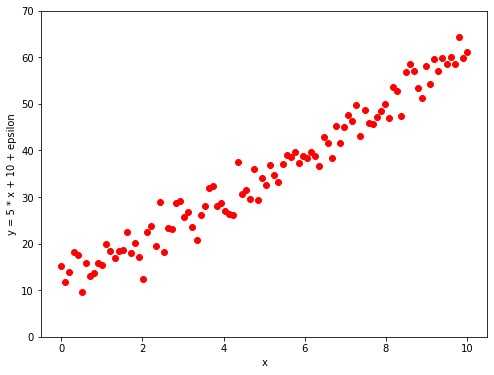

In [8]:
plt.figure(figsize = (8,6))
plt.scatter(x,y, c = "red")
plt.ylim([0, 70])
plt.xlabel('x')
plt.ylabel('y = 5 * x + 10 + epsilon')
plt.show()

we can say the features have a linear relationship but it is not strictly linear


The second dataset we will be using is an [auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset contains various characteristics for around 400 cars. We will use linear regression to predict the mpg label from seven features (4 continuous, 3 discrete).

In [9]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv('auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']

# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [10]:
# Split data into features and labels
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])
auto_mpg_y = auto_mpg_df['mpg']

**2.1.2 Plot the relationships between the label (mpg) and the continuous features (displacement, horsepower, weight, acceleration) using a small multiple of scatter plots. Make sure to label the axes.[4 points]**

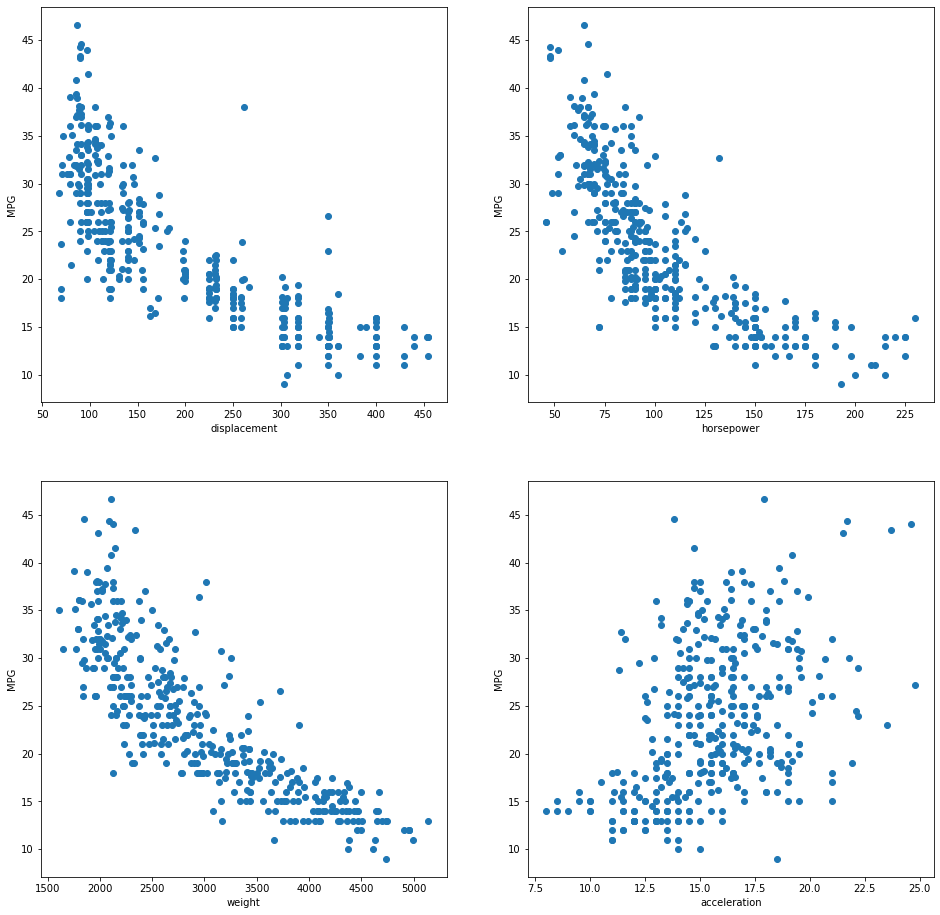

In [11]:
fig = plt.figure(figsize = (16,16))

ax1 = fig.add_subplot(221)
ax1.scatter(auto_mpg_df['displacement'], auto_mpg_df['mpg'])
ax1.set_ylabel('MPG')
ax1.set_xlabel('displacement')

ax2 = fig.add_subplot(222)
ax2.scatter(auto_mpg_df['horsepower'], auto_mpg_df['mpg'])
ax2.set_ylabel('MPG')
ax2.set_xlabel('horsepower')

ax3 = fig.add_subplot(223)
ax3.scatter(auto_mpg_df['weight'], auto_mpg_df['mpg'])
ax3.set_ylabel('MPG')
ax3.set_xlabel('weight')

ax4 = fig.add_subplot(224)
ax4.scatter(auto_mpg_df['acceleration'],auto_mpg_df['mpg'])
ax4.set_ylabel('MPG')
ax4.set_xlabel('acceleration')

plt.show()


**2.1.3 Plot the relationships between the label (mpg) and the discrete features (cylinders, model year, origin) using a small multiple of box plots. Make sure to label the axes.[3 points]**

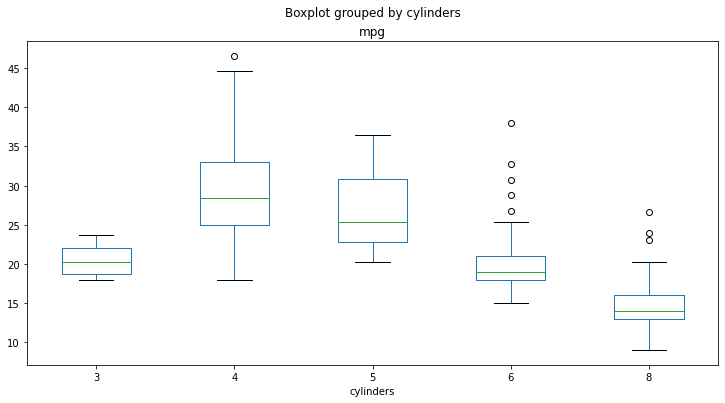

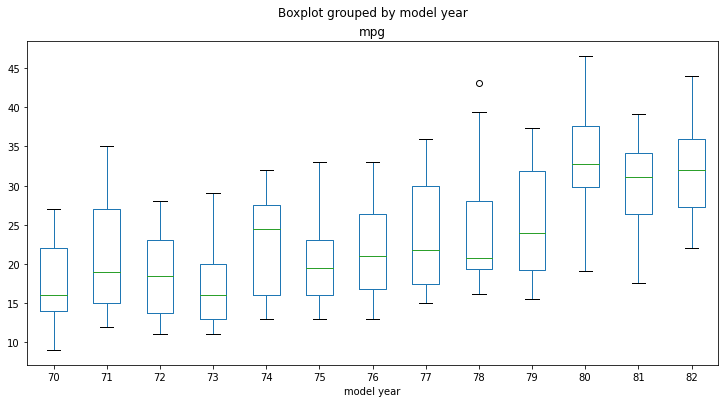

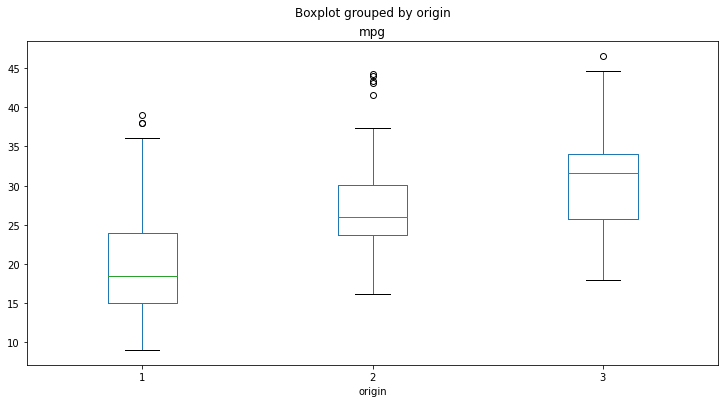

In [12]:

auto_mpg_df.boxplot(by = 'cylinders', column = ['mpg'], grid = False, figsize = (12,6))
auto_mpg_df.boxplot(by = 'model year', column = ['mpg'], grid = False, figsize = (12,6))
auto_mpg_df.boxplot(by = 'origin', column = ['mpg'], grid = False, figsize = (12,6))

plt.show()

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.[2 points]**

From the 4 assumptions of Linear Regression, we can not draw a conclusion that  
linear regression is a good model for this problem.

By observation, the y's do not have constant variance which violidate the 3rd  
assumption of Linearity assumptions and for the acceleration feature, without  
further investigation, we could not get any approprate regression model based  
on the 'random' points. the 𝜖's of x's are not drawn from a Normal distribution  

So, we could say linear regression is not a good model for this problem.  

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:


In [13]:

X = x.reshape((100, 1))   # Turn the x vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [38.44273829 19.38966655 26.79105322 30.69326568 45.00432104]


**2.1.5 Apply the same processing steps on the auto MPG dataset.[3 points]**

In [14]:
# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size=0.2, random_state=0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
auto_mpg_X_train = scaler.fit_transform(auto_mpg_X_train)   # Fit and transform scalar on auto_mpg_X_train
auto_mpg_X_val = scaler.transform(auto_mpg_X_val)           # Transform auto_mpg_X_val
auto_mpg_X_test = scaler.transform(auto_mpg_X_test)         # Transform auto_mpg_X_test

# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)), auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

print(auto_mpg_X_train[:5], '\n\n', auto_mpg_y_train[:5])

[[ 1.          0.37998163  0.39492947  0.1100916   0.8241919   0.28262047
  -0.57603817 -0.77559006]
 [ 1.         -0.83804168 -0.97348359 -0.87531843 -1.20346504 -0.54674887
  -0.02809942  0.43433043]
 [ 1.          1.59800495  1.33761402  1.37704734  1.02260224 -1.159761
  -0.85000755 -0.77559006]
 [ 1.         -0.83804168 -0.5173459  -0.48115442 -0.53443504 -0.00585582
   1.34174745 -0.77559006]
 [ 1.         -0.83804168 -0.97348359 -1.49471902 -1.0244118   2.15771638
   1.06777808  0.43433043]] 

 135    18.0
197    29.0
89     15.0
338    27.2
325    44.3
Name: mpg, dtype: float64


At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.6 Implement a `LinearRegression` class with two methods: `train` and `predict`.[8 points]**
You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.

In [15]:
class LinearRegression():
    
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).
    
    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None
        
    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        
        # Matrix construction
        
        m, n  = X.shape
        
        I = np.identity(n)
        
        self.w = np.linalg.solve(np.matmul(X.T, X) + self.alpha * I, np.matmul(X.T, y))
        
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        
        y_pred = np.matmul(X, self.w)
        
        return y_pred
        

### Train,  Evaluate, and Interpret Linear Regression Model

**2.1.7 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.[3 points]**

In [16]:
L = LinearRegression(alpha = 0)
L.train(X_train, y_train)
y_test_pred = L.predict(X_test)

# first 3 and last 3

y_pred_first_3 = y_test_pred[0:3]
y_pred_last_3 = y_test_pred[-3:]

# actual labels

y_test_first_3 = y_test[0:3]
y_test_last_3 = y_test[-3:]

y_sum_pred = [y_pred_first_3, y_pred_last_3]
y_sum_actual = [y_test_first_3, y_test_last_3]

# report

print("first 3 and last 3 predictions on X_test, along with the actual labels in y_test are shown as below:\n",
      "\rfirst 3 and last 3 predictions on X_test\n",
      y_sum_pred,'\n' 
      "\rthe actual labels in y_test:\n",
      y_sum_actual)

first 3 and last 3 predictions on X_test, along with the actual labels in y_test are shown as below:
first 3 and last 3 predictions on X_test
 [array([23.29684501, 53.01355017, 11.41016295]), array([22.30628817, 26.76379395, 14.38183346])] 
the actual labels in y_test:
 [array([23.26858868, 56.97068215, 13.94631496]), array([28.93047599, 20.72427726, 13.73074749])]


**2.1.8 Plot a scatter plot of y_test vs X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.[2 points]** If your line goes through the data points, you have likely implemented the linear regression correctly!

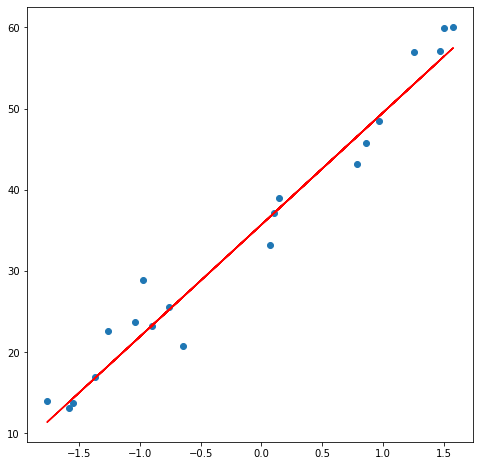

In [17]:
y_hat = np.matmul(X_test, L.w)

fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(111)
ax1.scatter(X_test[:,1], y_test)
ax1.plot(X_test[:,1], y_hat, c = 'red')

plt.show()

**2.1.9 Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.[4 points]**

In [18]:
L = LinearRegression(alpha = 0)
L.train(auto_mpg_X_train, auto_mpg_y_train)

auto_mpg_y_train_pred = L.predict(auto_mpg_X_train)
auto_mpg_y_test_pred = L.predict(auto_mpg_X_test)
auto_mpg_y_val_pred = L.predict(auto_mpg_X_val)

# first 3 and last 3

auto_mpg_y_pred_first_3 = auto_mpg_y_test_pred[0:3]
auto_mpg_y_pred_last_3 = auto_mpg_y_test_pred[-3:]

# actual labels
auto_mpg_y_test_value = auto_mpg_y_test.values
auto_mpg_y_test_first_3 = auto_mpg_y_test_value[0:3]
auto_mpg_y_test_last_3 = auto_mpg_y_test_value[-3:]

auto_mpg_y_sum_pred = [auto_mpg_y_pred_first_3, auto_mpg_y_pred_last_3]
auto_mpg_y_sum_actual = [auto_mpg_y_test_first_3, auto_mpg_y_test_last_3]

# MSE of three data sets

from sklearn.metrics import mean_squared_error
 
train_mse = mean_squared_error(auto_mpg_y_train, auto_mpg_y_train_pred)
test_mse = mean_squared_error(auto_mpg_y_test, auto_mpg_y_test_pred)
vali_mse = mean_squared_error(auto_mpg_y_val, auto_mpg_y_val_pred) 

# report

print("first 3 and last 3 predictions on X_test, along with the actual labels in y_test are shown as below:")
print("first 3 and last 3 predictions on X_test:")
print(auto_mpg_y_sum_pred)

print("the actual labels in y_test")
print(auto_mpg_y_sum_actual)

print("MSEs of train, test and val")
print(train_mse,test_mse, vali_mse)

first 3 and last 3 predictions on X_test, along with the actual labels in y_test are shown as below:
first 3 and last 3 predictions on X_test:
[array([26.3546854 , 25.49133646, 10.15877236]), array([26.85946741, 21.85952894, 32.03222623])]
the actual labels in y_test
[array([28. , 22.3, 12. ]), array([26. , 19.2, 31.5])]
MSEs of train, test and val
10.670584193330882 10.881879498129619 12.94479874878263


**2.1.10 As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. [3 points]** This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.

In [19]:
# mean of the training labels

mean = np.mean(auto_mpg_y_train)
print(len(auto_mpg_y_train))
train_mse = mean_squared_error(auto_mpg_y_train, np.ones(len(auto_mpg_y_train))*mean)
test_mse = mean_squared_error(auto_mpg_y_test, np.ones(len(auto_mpg_y_test))*mean)
vali_mse = mean_squared_error(auto_mpg_y_val, np.ones(len(auto_mpg_y_val))*mean) 

print("MSE of training, validation, and test:")
print(train_mse, test_mse, vali_mse)

234
MSE of training, validation, and test:
60.56461465410184 62.46160518794076 60.47988929483246


**2.1.11 Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. [3 points]** Make sure to label the bars (x-axis) and don't forget the bias term!

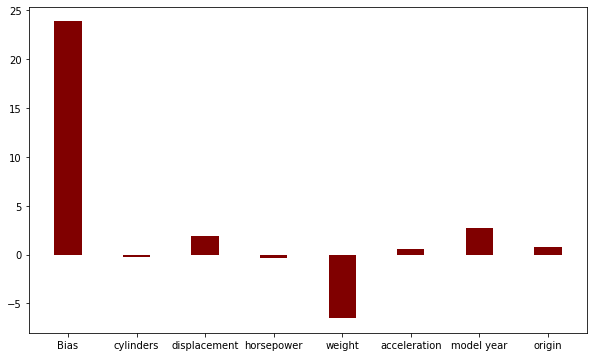

In [20]:
name = list(auto_mpg_df)
name[0] = 'Bias'

fig = plt.figure(figsize = (10,6))

plt.bar(name, height = L.w,color = 'maroon', width = 0.4)

plt.show()

**2.1.12 According to your model, which features are the greatest contributors to the MPG?[2 points]**

weight, displacement, and model year

### Tune Regularization Parameter $\alpha$

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.

**2.1.13 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.[4 points]**

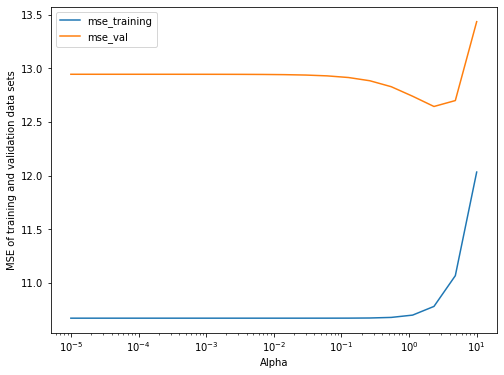

In [21]:
alphas = np.logspace(-5,1,20)

from sklearn.metrics import mean_squared_error

# loop over all the alphas and store all the corresponding results

mse_training = []
mse_val = []

for a in alphas:
    
    L = LinearRegression(alpha = a)
    L.train(auto_mpg_X_train, auto_mpg_y_train)
    
    auto_mpg_y_train_pred = L.predict(auto_mpg_X_train)
    auto_mpg_y_val_pred = L.predict(auto_mpg_X_val)
    
    mse_training.append(mean_squared_error(auto_mpg_y_train, auto_mpg_y_train_pred))
    mse_val.append(mean_squared_error(auto_mpg_y_val, auto_mpg_y_val_pred))

fig = plt.figure(figsize = (8,6))

plt.plot(alphas, mse_training, label = 'mse_training')
plt.plot(alphas, mse_val, label = 'mse_val')
plt.xscale("log")
plt.xlabel('Alpha')
plt.ylabel('MSE of training and validation data sets')
plt.legend()

plt.show()

**2.1.14 Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?[ 2 points]**

As for the training dataset, the MSE first shows stability but finally goes up as the alpha increases. 

As for the validation dataset, the MSE first decreases then goes up as the alpha increases.

## Part 2: Logistic Regression

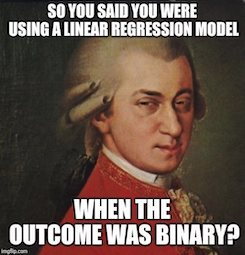






**In this part we would use Logistic Regression on NBA rookie stats to predict if player will last 5 years in league**

Class variable represent:
y = 0 if career years played < 5
y = 1 if career years played >= 5


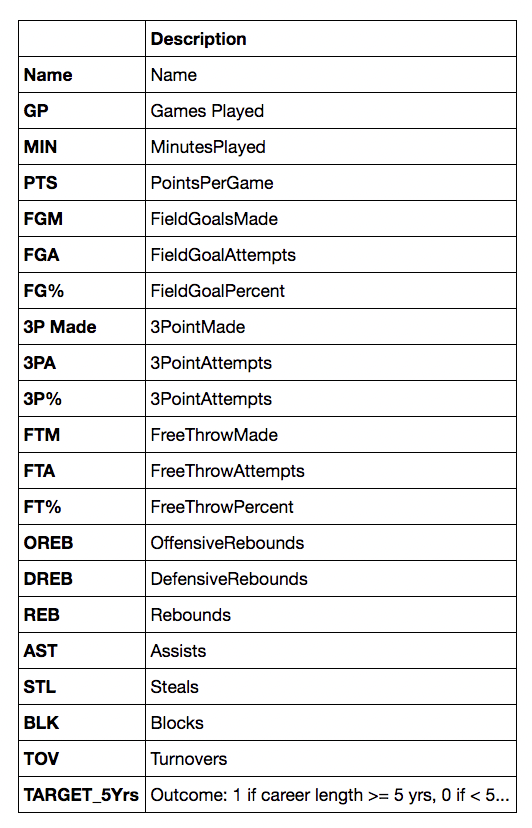

In [22]:
nba_reg = pd.read_csv("nba_logreg.csv")
nba_reg.head()
nba_reg.shape
nba_reg

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Missing Value analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)
(Note: Name your dataset as nba_reg_new after removing NAs) [2 points]**

In [23]:

# there are missing values in the dataset, check the df below:

nba_reg[nba_reg.isna().any(axis=1)]


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


In [24]:
nba_reg_new = nba_reg.dropna()

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.[3 points]**

In [25]:
nba_reg_new['TARGET_5Yrs'].value_counts()


1.0    826
0.0    503
Name: TARGET_5Yrs, dtype: int64

the # of 1.0 and 0.0 of TARGET_5Yrs are different which means the distribution of labels is not balanced

In [26]:
nba_X = nba_reg_new.drop(columns=['TARGET_5Yrs'])
nba_y = nba_reg_new['TARGET_5Yrs']

**2.2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?[4 points]**

In [27]:

nba_cor = nba_reg_new.corr()
nba_drop = nba_reg_new.drop(columns=['MIN','PTS','FGA','3PA', 'FTA', 'REB'])
nba_drop.corr()


,GP,FGM,FG%,3P Made,3P%,FTM,FT%,OREB,DREB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.000000,0.543000,0.296987,0.108195,0.038209,0.483185,0.197743,0.400184,0.467467,0.374311,0.452726,0.276700,0.518693,0.397783
FGM,0.543000,1.000000,0.297113,0.287956,0.119493,0.848146,0.219423,0.597468,0.705191,0.532261,0.662457,0.400744,0.834343,0.316393
FG%,0.296987,0.297113,1.000000,-0.291573,-0.330690,0.253381,-0.150996,0.512346,0.411103,-0.103546,0.061130,0.390786,0.126429,0.235587
3P Made,0.108195,0.287956,-0.291573,1.000000,0.589855,0.155717,0.312256,-0.218210,0.018688,0.374314,0.305146,-0.155955,0.257015,0.035025
3P%,0.038209,0.119493,-0.330690,0.589855,1.000000,0.030320,0.326372,-0.288759,-0.122949,0.262120,0.194329,-0.242274,0.108277,-0.003411
FTM,0.483185,0.848146,0.253381,0.155717,0.030320,1.000000,0.253125,0.586325,0.657652,0.474403,0.599534,0.412565,0.804762,0.295546
FT%,0.197743,0.219423,-0.150996,0.312256,0.326372,0.253125,1.000000,-0.147512,-0.021901,0.292877,0.202791,-0.160008,0.195242,0.095621
OREB,0.400184,0.597468,0.512346,-0.218210,-0.288759,0.586325,-0.147512,1.000000,0.838904,-0.010736,0.287982,0.649201,0.422708,0.294637
DREB,0.467467,0.705191,0.411103,0.018688,-0.122949,0.657652,-0.021901,0.838904,1.000000,0.189380,0.413893,0.687627,0.572049,0.285673
AST,0.374311,0.532261,-0.103546,0.374314,0.262120,0.474403,0.292877,-0.010736,0.189380,1.000000,0.751109,-0.083851,0.747442,0.173788


The reason I dropped these features mainly based on the relationship between "Made" and "Attempts", so i dropped  
features ending with "Attempts". Is it necessary to drop those columns before processding because a group of highly  
correlated features will not bring additional information (or just very few), but will increase the complexity  
of the algorithm, thus increasing the risk of errors.  

**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [28]:
# Split data into features and labels

nba_new_X = nba_drop.drop(columns=['TARGET_5Yrs', 'Name'])
nba_new_Y = nba_drop['TARGET_5Yrs']
print(nba_new_X.columns)

Index(['GP', 'FGM', 'FG%', '3P Made', '3P%', 'FTM', 'FT%', 'OREB', 'DREB',
       'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')


**2.2.4 Apply the following pre-processing steps:[5 points]**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [29]:
# 1. Convert the label from a Pandas series to a Numpy (m x 1) vector

nba_new_Y_np = nba_new_Y.to_numpy().reshape(nba_new_Y.shape[0],1)

# cancer_y_enc = cancer_df['diagnosis'].to_numpy()
# cancer_y_enc = cancer_y_enc.reshape(cancer_y_enc.shape[0],1)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets.

nba_X_dev, nba_X_test, nba_y_dev, nba_y_test = train_test_split(nba_new_X, nba_new_Y_np, test_size=0.2, random_state=0)
nba_X_train, nba_X_val, nba_y_train, nba_y_val = train_test_split(nba_X_dev, nba_y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
nba_X_train = scaler.fit_transform(nba_X_train)   # Fit and transform scalar on X_train
nba_X_val = scaler.transform(nba_X_val)           # Transform X_val
nba_X_test = scaler.transform(nba_X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
nba_X_train = np.hstack([np.ones((nba_X_train.shape[0], 1)), nba_X_train])
nba_X_val = np.hstack([np.ones((nba_X_val.shape[0], 1)), nba_X_val])
nba_X_test = np.hstack([np.ones((nba_X_test.shape[0], 1)), nba_X_test])

# print(nba_X_train[:5], '\n\n', nba_y_train[:5])

# print(nba_new_Y_np)

### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [30]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.[6 points]**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.[2 points] 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)[ 3 points]**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.[1 point]

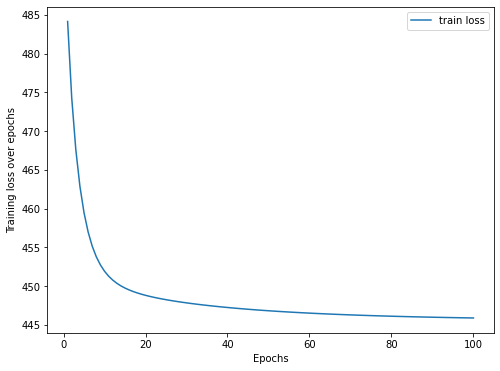

In [31]:
# Part A

LR = LogisticRegression(alpha = 0, t = 100, eta = 1e-3)
loss = LR.train(nba_X_train, nba_y_train)

x_t = np.linspace(1, 100, 100)

loss_new = []

for t in range(len(loss)):
    loss_new.append(loss[t][0][0])

loss = loss_new

fig = plt.figure(figsize = (8,6))

plt.plot(x_t, loss, label = 'train loss')

plt.xlabel('Epochs')
plt.ylabel('Training loss over epochs')
plt.legend()

plt.show()

In [32]:
# Part B 

import random
import sklearn


loss_last = 0

for i in range(20):
    
    alpha = random.uniform(0, 1)
    eta = random.uniform(0, 0.001)
    t = random.randint(0, 100)

    alpha_last = alpha
    eta_last = eta
    t_last = t
    
    
    LR = LogisticRegression(alpha, t, eta)
    loss = LR.train(nba_X_train, nba_y_train)

    x_t = np.linspace(1, 100, 100)

    loss_new = []
    
    for t in range(len(loss)):
        loss_new.append(loss[t][0][0])

    loss = loss_new
    
    if loss[-1] <= loss_last:
        loss_last = loss[-1]
        alpha_last = alpha
        eta_last = eta
        t_last = t
    
print(alpha_last, eta_last, t_last)

    
# Part C - Accuracy Comparison
LR = LogisticRegression(alpha = 0, t = 100, eta = 1e-3)
LR.train(nba_X_train, nba_y_train)
pred_A = LR.predict(nba_X_train)
acc_A = sklearn.metrics.accuracy_score(nba_y_train, pred_A)
print(acc_A)

LR = LogisticRegression(alpha = alpha_last, t = t_last, eta = eta_last)
LR.train(nba_X_train, nba_y_train)
pred_B = LR.predict(nba_X_train)
acc_B = sklearn.metrics.accuracy_score(nba_y_train, pred_B)
print(acc_B)


0.5661077077807564 0.0005296571090441228 70
0.7101631116687579
0.71267252195734


### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term![2 points]**

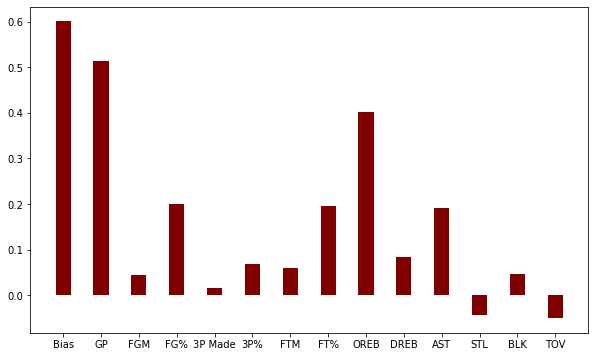

In [33]:
name = list(nba_new_X)
name.insert(0,'Bias')

fig = plt.figure(figsize = (10,6))

plt.bar(name, height = LR.w.T[0], color = 'maroon', width = 0.4)

plt.show()


# **Part 3: Support Vector Machines**

In this part, we will be using a breast cancer dataset for classification. 

Given 30 continuous features describing the nuclei of cells in a digitized image of a fine needle aspirate (FNA) of a breast mass, we will train SVM models to classify each sample as benign (B) or malignant (M).

In [34]:
cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
# Split data into features and labels

cancer_X = cancer_df.drop(columns=['diagnosis'])
cancer_y = cancer_df['diagnosis']

**The following pre-processing steps have been applied to the breast cancer dataset in the next cell:**

1. Encode the categorical label as 0 (B) or 1 (M).
2. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model (certain broadcasting operations may fail unexpectedly).
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from cancer_X_train, and apply it to cancer_X_train, cancer_X_val, and cancer_X_test.
4. Add a column of ones to the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [36]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cancer_df['diagnosis'] = cancer_df.diagnosis.astype("category").cat.codes
cancer_y_enc = cancer_df['diagnosis'].to_numpy()
cancer_y_enc = cancer_y_enc.reshape(cancer_y_enc.shape[0],1)
print(cancer_y_enc.shape)
print(type(cancer_y_enc))


cancer_X_dev, cancer_X_test, cancer_y_dev, cancer_y_test = train_test_split(cancer_X, cancer_y_enc, test_size=0.2, random_state=0)
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X_dev, cancer_y_dev, test_size=0.25, random_state=0)


scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train) 
cancer_X_val = scaler.transform(cancer_X_val)
cancer_X_test = scaler.transform(cancer_X_test)


cancer_X_train = np.hstack([np.ones((cancer_X_train.shape[0], 1)), cancer_X_train])
cancer_X_val = np.hstack([np.ones((cancer_X_val.shape[0], 1)), cancer_X_val])
cancer_X_test = np.hstack([np.ones((cancer_X_test.shape[0], 1)), cancer_X_test])


(569, 1)
<class 'numpy.ndarray'>


### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [37]:
from sklearn.svm import SVC, LinearSVC
SVM_primal = LinearSVC(dual = False).fit(cancer_X_train, cancer_y_train)

# Make Precictions on the Training, Validation, and Test Sets
cancer_train_pred = SVM_primal.predict(cancer_X_train)
cancer_val_pred = SVM_primal.predict(cancer_X_val)
cancer_test_pred = SVM_primal.predict(cancer_X_test)

# Report Accuracy 
acc_primal_train = sklearn.metrics.accuracy_score(cancer_y_train, cancer_train_pred)
acc_primal_val = sklearn.metrics.accuracy_score(cancer_y_val, cancer_val_pred)
acc_primal_test = sklearn.metrics.accuracy_score(cancer_y_test, cancer_test_pred)

print('The accuracy of the training data is:', acc_primal_train)
print('The accuracy of the validation data is:', acc_primal_val)
print('The accuracy of the test data is:', acc_primal_test)

The accuracy of the training data is: 0.9912023460410557
The accuracy of the validation data is: 0.9298245614035088
The accuracy of the test data is: 0.9473684210526315


/Users/imac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [38]:
from sklearn.svm import SVC, LinearSVC
SVM_dual = LinearSVC(dual = True).fit(cancer_X_train, cancer_y_train)

# Make Precictions on the Training, Validation, and Test Sets
cancer_train_pred_dual = SVM_dual.predict(cancer_X_train)
cancer_val_pred_dual = SVM_dual.predict(cancer_X_val)
cancer_test_pred_dual = SVM_dual.predict(cancer_X_test)

# Report Accuracy 
acc_dual_train = sklearn.metrics.accuracy_score(cancer_y_train, cancer_train_pred_dual)
acc_dual_val = sklearn.metrics.accuracy_score(cancer_y_val, cancer_val_pred_dual)
acc_dual_test = sklearn.metrics.accuracy_score(cancer_y_test, cancer_test_pred_dual)

print('The accuracy of the training data is:', acc_dual_train)
print('The accuracy of the validation data is:', acc_dual_val)
print('The accuracy of the test data is:', acc_dual_test)


The accuracy of the training data is: 0.9912023460410557
The accuracy of the validation data is: 0.9298245614035088
The accuracy of the test data is: 0.9473684210526315


/Users/imac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
